<a href="https://colab.research.google.com/github/get2aakash/DSMLprojects/blob/main/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
os.listdir('/content/Sales')

['Sales_January_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_March_2019.csv',
 'Sales_July_2019.csv',
 'Sales_November_2019.csv',
 'Sales_May_2019.csv',
 'Sales_October_2019.csv',
 'Sales_June_2019.csv',
 'Sales_September_2019.csv',
 'Sales_February_2019.csv']

In [4]:
for file in os.listdir('/content/Sales'):
  print(file)

Sales_January_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_April_2019.csv
Sales_March_2019.csv
Sales_July_2019.csv
Sales_November_2019.csv
Sales_May_2019.csv
Sales_October_2019.csv
Sales_June_2019.csv
Sales_September_2019.csv
Sales_February_2019.csv


In [5]:
path = '/content/Sales'

all_data = pd.DataFrame()
for file in os.listdir('/content/Sales'):
  current_df=pd.read_csv(path+"/"+file)
  all_data=pd.concat([all_data,current_df])

all_data.shape

(186850, 6)

In [6]:
all_data.to_csv('all_data.csv')

#Data Pre_processing

In [7]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [8]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
all_data = all_data.dropna(how="all") #dropna data altogether

In [10]:
all_data.shape

(186305, 6)

In [11]:
all_data.isnull().sum() #no more missing data

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [12]:
'01/22/19 21:25'.split('/') #split data based on "/"

['01', '22', '19 21:25']

In [13]:
#define function to get month value , ie zero column
def month(x):
  return x.split('/')[0]

In [14]:
all_data['month']= all_data['Order Date'].apply(month) #apply "month" funciton 

In [15]:
all_data.head() #we can see last column month is now created

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [16]:
all_data.info() #we can see data type is object so this need to be converted to  number so to run analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 12035
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   month             186305 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


In [17]:
all_data['month'].unique()

array(['01', 'Order Date', '02', '08', '09', '12', '04', '05', '03', '07',
       '11', '06', '10'], dtype=object)

In [18]:
filter = all_data['month']=='Order Date' #Create a filter to exclude rubbish data

In [19]:
all_data = all_data[~filter] #apply the filter

In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [21]:
all_data['month'] = all_data['month'].astype(int)

In [22]:
all_data.info() #now we can see month is converted to integer

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 12035
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   month             185950 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 11.3+ MB


In [23]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)

In [24]:
all_data.info() #now we can see Quantity Ordered is converted to integer

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 12035
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  int64 
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   month             185950 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 11.3+ MB


In [25]:
 all_data['Price Each'] = all_data['Price Each'].astype(float)

In [26]:
all_data.info() #now we can see Price Each is converted to float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 12035
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   month             185950 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.3+ MB


In [27]:
all_data['sales'] =  all_data['Price Each']*all_data['Quantity Ordered'] #obtain total sales
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 12035
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   month             185950 non-null  int64  
 7   sales             185950 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 12.8+ MB


#Data Analysis

In [30]:
Total_sales = all_data.groupby('month')['sales'].sum() #Group by month to obtain sales
Total_sales

month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: sales, dtype: float64

Text(0.5, 1.0, 'Total sales per month in India')

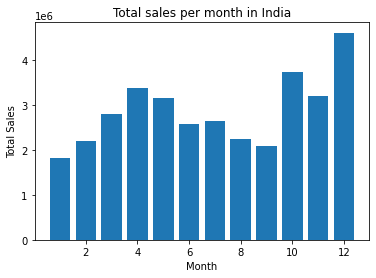

In [31]:
#months=[]
month=range(1,13)
plt.bar(month,Total_sales)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total sales per month in India')

#City with max total sales 

In [32]:
  
  all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [33]:
'944 Walnut St, Boston, MA 02215'.split(',')

['944 Walnut St', ' Boston', ' MA 02215']

In [34]:
def city(x):
  return x.split(',')[-2]

In [35]:
all_data['Purchase Address'].apply(city)

0                Boston
1              Portland
2         San Francisco
3           Los Angeles
4                Austin
              ...      
12031     San Francisco
12032       Los Angeles
12033           Atlanta
12034            Dallas
12035       Los Angeles
Name: Purchase Address, Length: 185950, dtype: object

In [36]:
all_data['City'] = all_data['Purchase Address'].apply(city)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 12035
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   month             185950 non-null  int64  
 7   sales             185950 non-null  float64
 8   City              185950 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 14.2+ MB


In [37]:
all_data['City'].unique()

array([' Boston', ' Portland', ' San Francisco', ' Los Angeles',
       ' Austin', ' Atlanta', ' Seattle', ' New York City', ' Dallas'],
      dtype=object)

In [38]:
Total_sales_city = all_data.groupby(all_data['City'])['sales'].sum() #Group by city to obtain sales
Total_sales_city

City
 Atlanta          2.795499e+06
 Austin           1.819582e+06
 Boston           3.661642e+06
 Dallas           2.767975e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Portland         2.320491e+06
 San Francisco    8.262204e+06
 Seattle          2.747755e+06
Name: sales, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

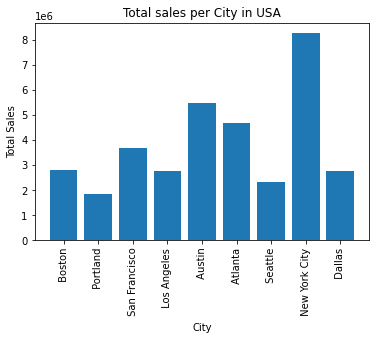

In [39]:
city_name = all_data['City'].unique()
plt.bar(city_name,Total_sales_city)
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Total sales per City in USA')
plt.xticks(rotation=90)


#Time when product purchase is maximum

In [40]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin


In [41]:
all_data['Order Date'].dtype 

dtype('O')

In [42]:
#convert to date time 
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [43]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 12035
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   month             185950 non-null  int64         
 7   sales             185950 non-null  float64       
 8   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 14.2+ MB


In [44]:
 all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour#get hour columns

In [45]:
all_data.head() #hour column is added

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,11


In [46]:
Total_Order_perhour = all_data.groupby(all_data['Hour'])['Hour'].count() #Group by hour
Total_Order_perhour

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Hour, dtype: int64

In [47]:
keys=[]
hour=[]
for key,hour_df in all_data.groupby('Hour'):
  keys.append(key)
  print(key)
  hour.append(len(hour_df))
  print(len(hour_df))

0
3910
1
2350
2
1243
3
831
4
854
5
1321
6
2482
7
4011
8
6256
9
8748
10
10944
11
12411
12
12587
13
12129
14
10984
15
10175
16
10384
17
10899
18
12280
19
12905
20
12228
21
10921
22
8822
23
6275


Text(0.5, 1.0, 'Total order per hour')

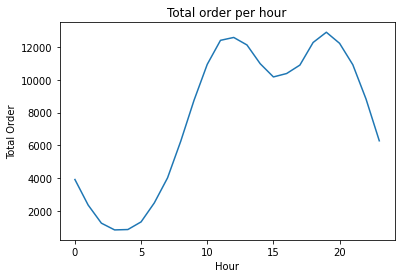

In [48]:
plt.plot(keys,hour)
plt.xlabel('Hour')
plt.ylabel('Total Order')
plt.title('Total order per hour')

FInd which product sold most

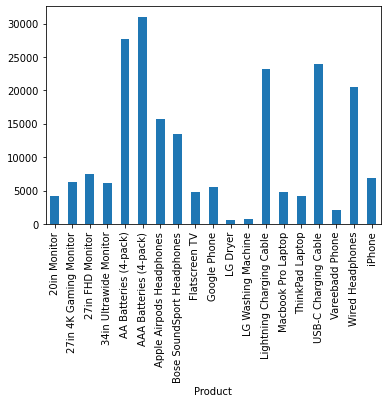

In [49]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [50]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [51]:
products = all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity = all_data.groupby('Product')['Quantity Ordered'].sum()
prices = all_data.groupby('Product')['Price Each'].mean()

In [52]:
products

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

In [53]:
quantity

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [54]:
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

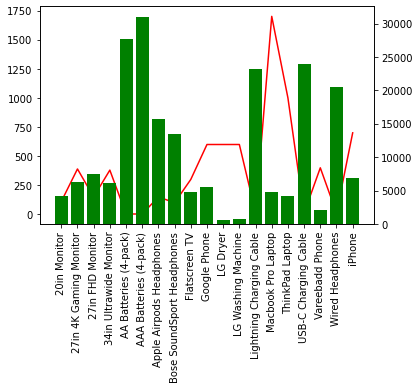

In [55]:
#n the Axes Module, there is a function named Axes.twinx() function which is used to create a twin Axes that are sharing the x-axis. Similarly, the function twiny() is used to create a second x axis in your figure, which means twin axes sharing the y-axis.
%matplotlib inline
fig,ax1=plt.subplots()
ax2=ax1.twinx()
curve2 = ax2.bar(products,quantity,color='g')
curve1 = ax1.plot(products,prices,color='r')
ax1.set_xticklabels(products,rotation='vertical')
plt.plot()
plt.show()

#Products sold together i.e. same ordered ID

In [56]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,11


In [57]:
"""
subset: Takes a column or list of column label. It’s default value is none. After passing columns, it will consider them only for duplicates.
keep: Controls how to consider duplicate value. It has only three distinct value and default is ‘first’.

–> If ‘first’, it considers first value as unique and rest of the same values as duplicate.
–> If ‘last’, it considers last value as unique and rest of the same values as duplicate.
–> If False, it consider all of the same values as duplicates.
"""

df=all_data['Order ID'].duplicated(keep=False)
df2=all_data[df]
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City,Hour
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,16
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,11


In [58]:
"""
A lambda function is a single-line function declared with no name, which can have any number of arguments,
but it can only have one expression. Such a function is capable of behaving similarly to a regular function declared using the Python's def keyword
"""
df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df2.head() # we see data repeated

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City,Hour,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,16,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,11,"Vareebadd Phone,Wired Headphones"


In [59]:
df2=df2.drop_duplicates(subset=['Order ID'])
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City,Hour,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,11,"Vareebadd Phone,Wired Headphones"
153,141384,Google Phone,1,600.00,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",1,600.00,Boston,0,"Google Phone,USB-C Charging Cable"
220,141450,Google Phone,1,600.00,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",1,600.00,San Francisco,11,"Google Phone,Bose SoundSport Headphones"


In [60]:
df2['Grouped'].value_counts()

iPhone,Lightning Charging Cable                                           882
Google Phone,USB-C Charging Cable                                         856
iPhone,Wired Headphones                                                   361
Vareebadd Phone,USB-C Charging Cable                                      312
Google Phone,Wired Headphones                                             303
                                                                         ... 
iPhone,Lightning Charging Cable,Wired Headphones,USB-C Charging Cable       1
Google Phone,USB-C Charging Cable,Wired Headphones,27in FHD Monitor         1
Google Phone,USB-C Charging Cable,USB-C Charging Cable                      1
Flatscreen TV,20in Monitor                                                  1
iPhone,Lightning Charging Cable,Wired Headphones,AA Batteries (4-pack)      1
Name: Grouped, Length: 366, dtype: int64

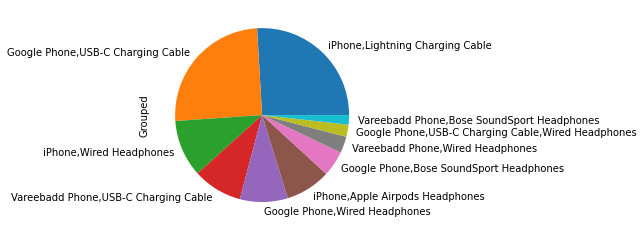

In [61]:
df2['Grouped'].value_counts()[0:10].plot.pie()